# EDA 연습

### MovieLens, 기후데이터를 사용한 연습.

### 라이브러리

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np

## 1. 기후 데이터를 사용한 EDA


In [104]:
weather_seoul = pd.read_csv('weather_seoul.csv')
weather_daegu = pd.read_csv('weather_daegu.csv')
weather_seoul.columns = ['date', 'point', 'avg_temp', 'min_temp', 'max_temp']
weather_daegu.columns = ['date', 'point', 'avg_temp', 'min_temp', 'max_temp']
weather_daegu

,date,point,avg_temp,min_temp,max_temp
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42048,2022-03-16,143,14.4,5.1,23.0
42049,2022-03-17,143,8.8,6.3,13.6
42050,2022-03-18,143,6.1,4.3,8.1
42051,2022-03-19,143,4.9,3.0,8.1


#### 1. 기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은 언제였고, 몇도인가요?

In [105]:
weather_seoul.columns = ['date', 'point', 'avg_temp', 'min_temp', 'max_temp']
weather_seoul[(weather_seoul['max_temp'] == weather_seoul['max_temp'].max())]

,date,point,avg_temp,min_temp,max_temp
40051,2018-08-01,108,33.6,27.8,39.6


#### 2. 역사적으로 일교차가 가장 큰 날짜는 몇년 몇월 몇일 인가요?

In [106]:
def diff_temp (cols):
    min_temp = cols[0]
    max_temp = cols[1]

    return max_temp - min_temp

# 서울
weather_seoul_diff = weather_seoul[['min_temp', 'max_temp', 'date']]
weather_seoul_diff['diff_temp'] = weather_seoul_diff.apply(diff_temp, axis=1)
w_df1 = weather_seoul_diff[weather_seoul_diff['diff_temp'] == weather_seoul_diff['diff_temp'].max()]

# 대구
weather_daegu_diff = weather_daegu[['min_temp', 'max_temp', 'date']]
weather_daegu_diff['diff_temp'] = weather_daegu_diff.apply(diff_temp, axis=1)
w_df2 = weather_daegu_diff[weather_daegu_diff['diff_temp'] == weather_daegu_diff['diff_temp'].max()]
w_df1

<ipython-input-106-009fc9dcba04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_seoul_diff['diff_temp'] = weather_seoul_diff.apply(diff_temp, axis=1)
<ipython-input-106-009fc9dcba04>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_daegu_diff['diff_temp'] = weather_daegu_diff.apply(diff_temp, axis=1)


,min_temp,max_temp,date,diff_temp
12619,2.5,24.3,1942-04-19,21.8


#### 3. 1년 중 평균적으로 일교차가 가장 큰 날짜는 몇월 몇일 인가요?

In [140]:
# 서울
weather_seoul['date'] = pd.to_datetime(weather_seoul['date'])
weather_seoul_year = weather_seoul
weather_seoul_year['year'] = weather_seoul_year['date'].dt.year
weather_seoul_year['target'] = weather_seoul_year['date'].dt.strftime("%m-%d")
weather_seoul_year['diff_temp'] = weather_seoul_year['max_temp'] - weather_seoul_year['min_temp']
weather_seoul_grouped = weather_seoul_year.groupby(['year', 'target'], as_index=False).max()
w_df3 = weather_seoul_grouped[['year', 'diff_temp', 'target']]
w_df3.loc[(w_df3['diff_temp'] == w_df3['diff_temp'].max())]



# 대구
weather_daegu['date'] = pd.to_datetime(weather_daegu['date'])
weather_daegu_year = weather_daegu
weather_daegu_year['year'] = weather_seoul_year['date'].dt.year
# weather_daegu_year['diff_temp'] = weather_daegu_year['max_temp'] - weather_daegu_year['min_temp']
weather_daegu_grouped = weather_daegu_year.groupby('year', as_index=False).mean()
w_df4 = weather_daegu_grouped[['year', 'diff_temp']]
w_df4.loc[(w_df4['diff_temp'] == w_df4['diff_temp'].max())]

w_df3.groupby('year').max()

,diff_temp,target
year,,
1907,17.7,12-31
1908,19.7,12-31
1909,21.1,12-31
1910,19.1,12-31
1911,20.2,12-31
...,...,...
2018,17.6,12-31
2019,17.5,12-31
2020,16.5,12-31


#### 4. 가장 덥다고 알려진 대구보다 서울이 더 더운날이 가장 많은 연도는 언제인가요?

In [108]:
diff_seoul = weather_seoul_diff
diff_daegu = weather_daegu_diff

diff_year = pd.merge(diff_seoul, diff_daegu, on='date', how='inner')
# diff_year.columns = ['year', 'diff_temp_seoul', 'diff_temp_daegu']
# df5 = diff_year.loc[(diff_year['diff_temp_seoul'] > diff_year['diff_temp_daegu'])]
total_diff = diff_year.dropna(axis=0)
total_diff['date'] = pd.to_datetime(total_diff['date'])
total_diff['year'] = total_diff['date'].dt.year

w_df5 = total_diff.loc[(total_diff['max_temp_x'] > total_diff['max_temp_y'])]
w_df5['year'].value_counts()

<ipython-input-108-38d7565c7589>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_diff['date'] = pd.to_datetime(total_diff['date'])
<ipython-input-108-38d7565c7589>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_diff['year'] = total_diff['date'].dt.year


1930    133
1943    132
2016    128
1941    122
1931    122
       ... 
2013     41
1908      7
2022      3
1907      1
1953      1
Name: year, Length: 114, dtype: int64

## 2. MovieLens

In [189]:
# Movie Lens

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# 1. 사용자가 평가한 모든 영화의 전체 평균 평점을 출력하세요.

avg = ratings['rating'].mean()
avg
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
# 2. 각 사용자별 평균 평점을 구하세요. 출력시 정렬은 userid로 오름차순 정렬.

total_df = pd.merge(movies, ratings, on='movieId', how='inner')

grouped = ratings['rating'].groupby(ratings['userId'])

grouped.mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [5]:
# 3. 각 영화별 평균 평점을 구하세요.
# 출력시 정렬은 movieId로 오름차순 정렬합니다.

# dataframe 주로 사용할 내용으로 생성.
grouped_movie = total_df[['movieId', 'title', 'rating']]


movie_rating = grouped_movie.groupby(['movieId', 'title'], as_index=False)

df1 = movie_rating.mean()
df1

,movieId,title,rating
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),4.000000
9720,193583,No Game No Life: Zero (2017),3.500000
9721,193585,Flint (2017),3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000


In [177]:
# 4. 평균 평점이 가장 높은 영화의 제목을 출력하세요.
# 단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요.

df2 = grouped_movie.groupby('title', as_index=False).mean()

df2[df2['rating'] == df2['rating'].max()]

,title,movieId,rating
3,'Salem's Lot (2004),27751.0,5.0
35,12 Angry Men (1997),77846.0,5.0
37,12 Chairs (1976),141816.0,5.0
68,20 Million Miles to Earth (1957),5468.0,5.0
131,61* (2001),27373.0,5.0
...,...,...,...
9566,Won't You Be My Neighbor? (2018),187717.0,5.0
9570,Wonder Woman (2009),108795.0,5.0
9586,World of Glory (1991),158398.0,5.0
9593,Wow! A Talking Fish! (1983),173351.0,5.0


In [180]:
# 5. Comedy 영화 중 가장 평점이 낮은 영화의 제목을 출력하세요.
# 단, 동률이 있을 경우 모두 출력하고 title을 기준으로 오름차순 정렬하세요.

# 새로운 dataframe 생성.
genre_movie = total_df[["movieId", "title", "genres", 'rating']]
# df3 = genre_movie.groupby('title', as_index=False).min()
# df3[(df3['genres'].str.contains('Comedy')) & (df3['rating'] == df3['rating'].min())]

genre_movie_df = genre_movie[genre_movie['genres'].str.contains('Comedy')]
df3 = genre_movie_df.groupby('title', as_index=False).mean()
df3[df3['rating'] == df3['rating'].min()]

,title,movieId,rating
141,Aloha (2015),134528.0,0.5
223,Are We There Yet? (2005),31422.0,0.5
238,Arthur Christmas (2011),91414.0,0.5
293,Bad Santa 2 (2016),165645.0,0.5
487,Born to Be Wild (1995),6557.0,0.5
492,Boudu Saved From Drowning (Boudu sauvé des eau...,25782.0,0.5
538,"Brothers Solomon, The (2007)",54934.0,0.5
594,"Carabineers, The (Carabiniers, Les) (1963)",26095.0,0.5
809,Daddy Day Camp (2007),54768.0,0.5
1160,"Follow Me, Boys! (1966)",7312.0,0.5


In [13]:
# 6. 2015년도에 평가된 모든 Romance 영화의 평균 평점은?
import datetime
import time

start = time.mktime(datetime.datetime.strptime("2015-01-01 00:00:00", "%Y-%m-%d %H:%M:%S").timetuple())
end = time.mktime(datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S").timetuple())
time_movie = total_df[["genres", 'rating', 'timestamp']]
time_movie_df = time_movie[time_movie['genres'].str.contains('Romance')]
time_movie_df.loc[(time_movie_df['timestamp'] >= start) & (time_movie_df['timestamp'] < end), 'rating'].mean()

3.396375098502758

In [9]:
# 7. 모든 영화장르 중 사용자 평점이 가장 좋은 영화장르는 무엇인가요?
# 동률이 있으면 영화장르를 기준으로 오름차순 정렬하세요.

genres_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller', 'War', 'Western']
ratings_list = []
all_genres = total_df[['genres', 'rating']]

for i in genres_list:
    genres_df = all_genres[all_genres['genres'].str.contains(i)]
    ratings_list.append(genres_df['rating'].mean())

df4 = pd.DataFrame(zip(genres_list, ratings_list))
df4.columns = ['gernes', 'rating']
df4.sort_values('gernes')

,gernes,rating
0,Action,3.447984
1,Adventure,3.508609
2,Animation,3.629937
3,Children,3.412956
4,Comedy,3.384721
5,Crime,3.658294
6,Documentary,3.797785
7,Drama,3.656184
8,Fantasy,3.491001
9,Film-Noir,3.920115


## 3. 데이터 시각화

#### 기후 및 무비렌즈 데이터

<AxesSubplot:ylabel='Frequency'>

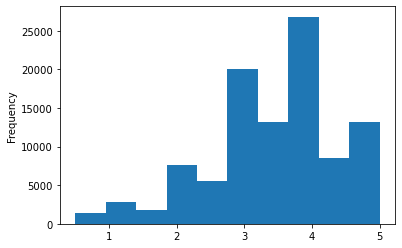

In [19]:
# 무비렌즈

# 1. 사용자가 평가한 모든 영화의 전체 평균 평점을 출력하세요.

plot1_df = ratings['rating']

plot1_df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

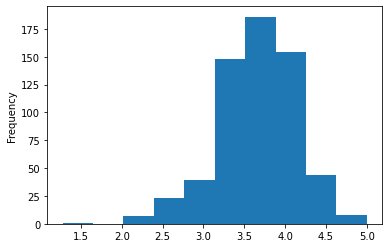

In [32]:
# 2. 각 사용자별 평균 평점을 구하세요. 출력시 정렬은 userid로 오름차순 정렬.
plot2_df = grouped.mean()

plot2_df.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

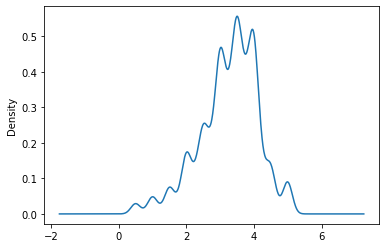

In [43]:
# 3. 각 영화별 평균 평점을 구하세요.

df1['rating'].plot(kind='kde')


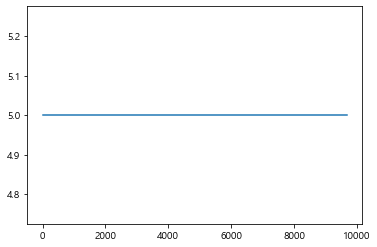

In [186]:
# 4. 평균 평점이 가장 높은 영화의 제목을 출력하세요.

plot3_df = df2[df2['rating'] == df2['rating'].max()]
S = plot3_df['rating']
plt.plot(S.index, S.values)

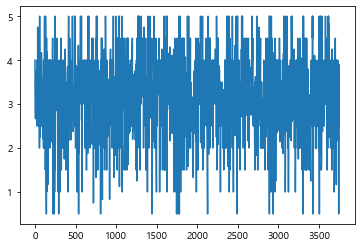

In [187]:
# 5. Comedy 영화 중 가장 평점이 낮은 영화의 제목을 출력하세요.

df3[df3['rating'] == df3['rating'].min()]
plot7_df = df3.loc[df3['title'].str.contains('20')]
plt.plot(plot7_df.index, plot7_df['rating'].values)

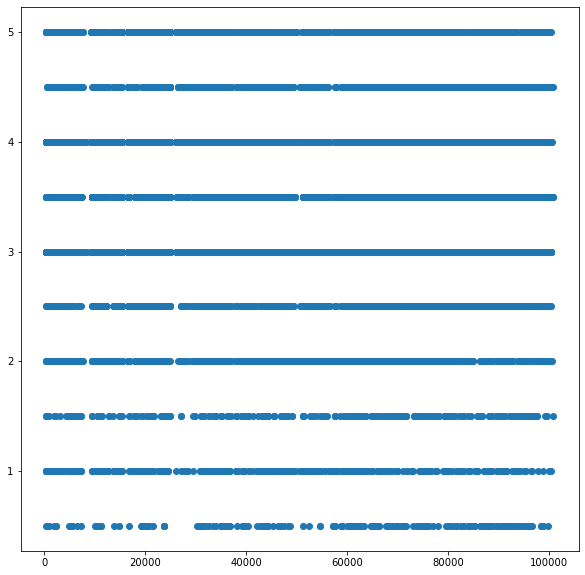

In [77]:
# 6. 2015년도에 평가된 모든 Romance 영화의 평균 평점은?

plot4_df = time_movie_df.loc[(time_movie_df['timestamp'] >= start) & (time_movie_df['timestamp'] < end), 'rating']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(time_movie_df.index, time_movie_df['rating'].values)

Text(0, 0.5, '평균 평점')

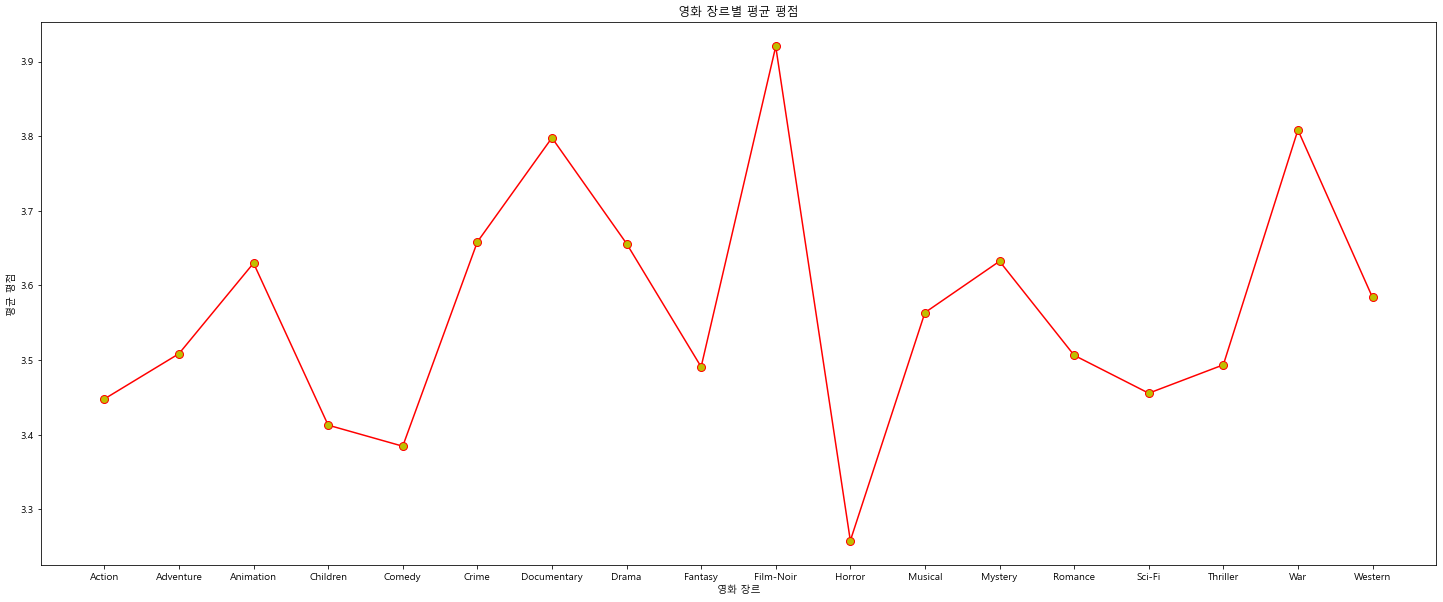

In [100]:
# 7. 모든 영화장르 중 사용자 평점이 가장 좋은 영화장르는 무엇인가요?

# 폰트 적용
font_path = 'C:/jupyter_home/font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



df4
# plt.plot(df4.index, df4['rating'].values)
df4

fig = plt.figure(figsize=(25, 10))
ax2 = fig.add_subplot(1,1,1)

ax2.plot(df4['gernes'].values, df4['rating'].values, marker='o', markersize=8, color='r', markerfacecolor='y')
ax2.set_title('영화 장르별 평균 평점')
ax2.set_xlabel('영화 장르')
ax2.set_ylabel('평균 평점')

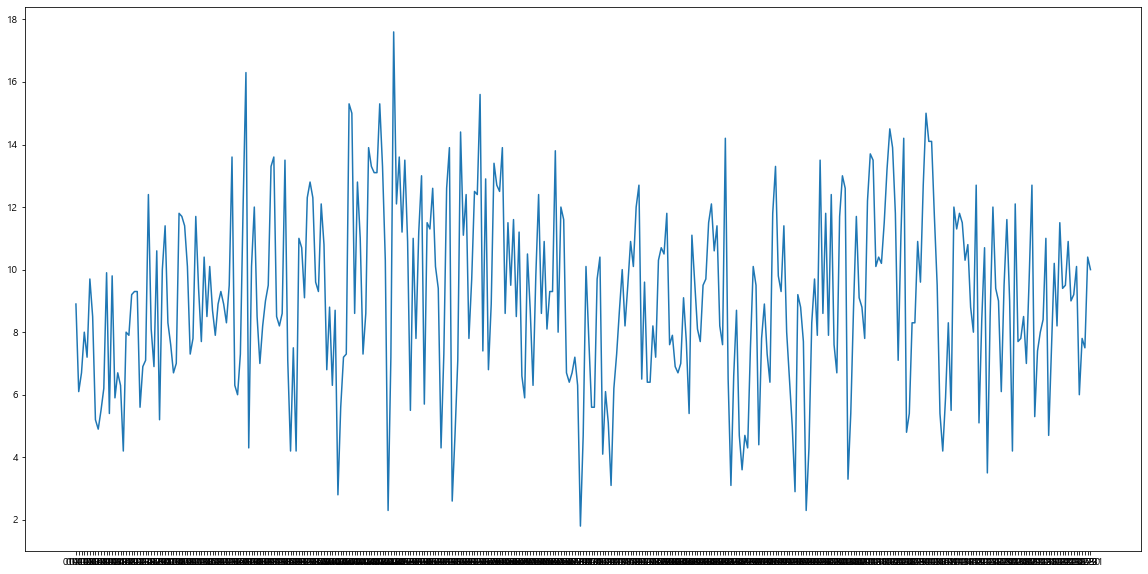

In [357]:
# 기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은 언제였고, 몇도인가요?

weather_seoul[(weather_seoul['max_temp'] == weather_seoul['max_temp'].max())]
plot5_df = weather_seoul.loc[(weather_seoul['year'] == 2018)]

# 온도가 가장 높았던 년도의 서울의 전체 일교차 그래프
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(plot5_df['target'], plot5_df['diff_temp'].values)


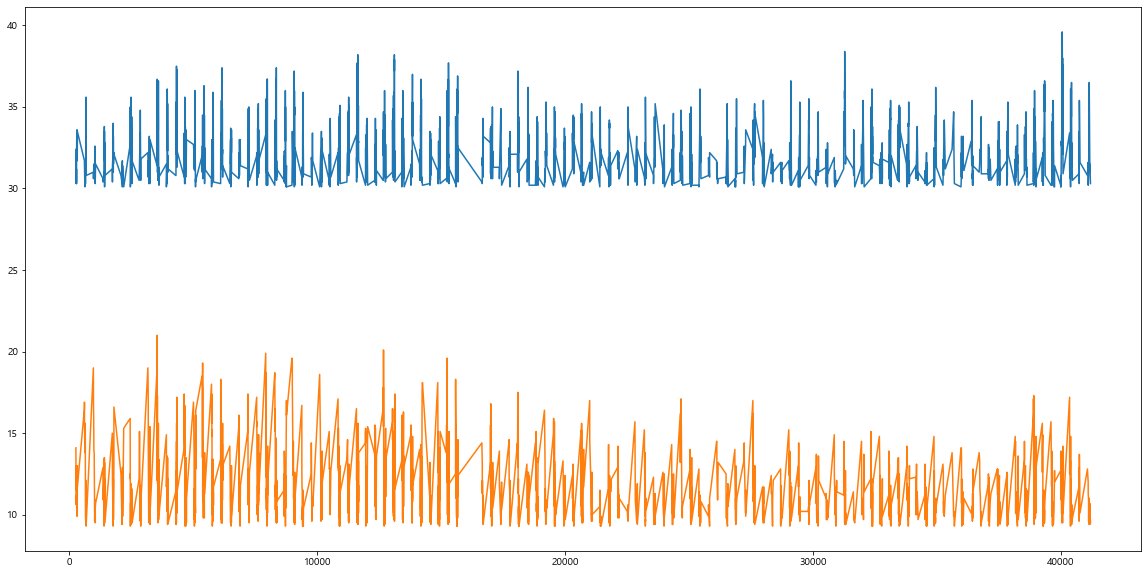

In [164]:
# 역사적으로 일교차가 가장 큰 날짜는 몇년 몇월 몇일 인가요?
w_df1

plot6_df = weather_seoul_diff[(weather_seoul_diff['diff_temp'] > weather_seoul_diff['diff_temp'].mean()) & (weather_seoul_diff['max_temp'] > 30)]
plot6_df

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(plot6_df['max_temp'].index, plot6_df['max_temp'].values, color='tab:blue')
ax1.plot(plot6_df['diff_temp'].index, plot6_df['diff_temp'].values, color='tab:orange')

<AxesSubplot:xlabel='year'>

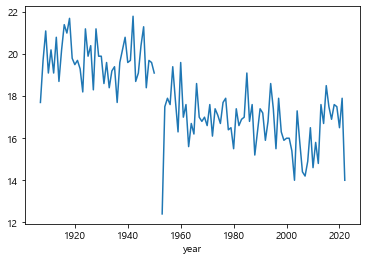

In [141]:
# 1년 중 평균적으로 일교차가 가장 큰 날짜는 몇월 몇일 인가요?

plot5_df = w_df3.groupby('year').max()
plot5_df['diff_temp'].plot()

<BarContainer object of 114 artists>

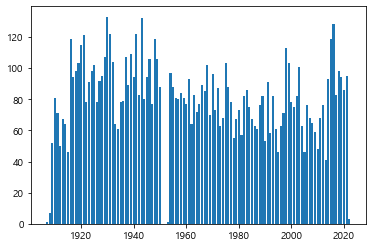

In [358]:
# 가장 덥다고 알려진 대구보다 서울이 더 더운날이 가장 많은 연도는 언제인가요?

plot7_df = w_df5['year'].value_counts()

plt.bar(plot7_df.index, plot7_df.values)

## 4. 추가 데이터 핸들링 연습

In [214]:
# 1. Romance 장르에 평가를 제일 많이 한 유저

df_ex1 = total_df.loc[(total_df['genres'].str.contains('Romance'))]
df1_grouped = df_ex1.groupby('userId')
df1_grouped['rating'].count().sort_values(ascending=False)

userId
474    510
414    509
599    367
606    355
68     288
      ... 
407      1
366      1
106      1
25       1
2        1
Name: rating, Length: 606, dtype: int64

In [232]:
# 2. 2010년 이후에 나온 영화 출력

df_ex2 = movies.loc[movies['title'].str.contains("201")]
df_ex2

,movieId,title,genres
1719,2311,2010: The Year We Make Contact (1984),Sci-Fi
7185,72378,2012 (2009),Action|Drama|Sci-Fi|Thriller
7221,73268,Daybreakers (2010),Action|Drama|Horror|Thriller
7223,73319,Leap Year (2010),Comedy|Romance
7224,73321,"Book of Eli, The (2010)",Action|Adventure|Drama
...,...,...,...
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama


In [238]:
# 3. 2000년 ~ 2009년에 나온 Action 장르 영화

df_ex3 = movies.loc[(movies['title'].str.contains('200')) & (movies['genres'].str.contains('Action'))]
df_ex3

,movieId,title,genres
1318,1772,Blues Brothers 2000 (1998),Action|Comedy|Musical
2462,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller
2487,3316,Reindeer Games (2000),Action|Thriller
2583,3452,Romeo Must Die (2000),Action|Crime|Romance|Thriller
2657,3555,U-571 (2000),Action|Thriller|War
...,...,...,...
9487,170289,Species III (2004),Action|Horror|Sci-Fi
9488,170297,Ultimate Avengers 2 (2006),Action|Animation|Sci-Fi
9497,170705,Band of Brothers (2001),Action|Drama|War
9547,172881,Final Flight of the Osiris (2003),Action|Animation|Sci-Fi


In [249]:
# 4. 2000년도 이후에 나온 Comedy 장르 영화들의 평점

df_ex4 = total_df.loc[(total_df['title'].str.contains('20')) & (total_df['genres'].str.contains('Comedy'))]
idx_1 = df_ex4.loc[(df_ex4['title'].str.contains('1998')) | (df_ex4['title'].str.contains('1999'))].index
df_ex4 = df_ex4.drop(idx_1)
df_ex4

,movieId,title,genres,userId,rating,timestamp
52364,3177,Next Friday (2000),Comedy,42,2.0,996216613
52365,3177,Next Friday (2000),Comedy,45,4.0,950727968
52366,3177,Next Friday (2000),Comedy,111,4.0,1516151963
52367,3177,Next Friday (2000),Comedy,274,3.5,1172025799
52368,3177,Next Friday (2000),Comedy,307,2.0,1186173247
...,...,...,...,...,...,...
100825,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,184,4.5,1537109489
100826,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554
100828,193571,Silver Spoon (2014),Comedy|Drama,184,4.0,1537099392
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082


In [254]:
# 5. 평가를 가장 많이 한 유저

df_ex5 = total_df[['rating', 'userId']].groupby('userId', as_index=False)
df_ex5.count().sort_values(by='rating', ascending=False)

,userId,rating
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346
...,...,...
441,442,20
568,569,20
319,320,20
575,576,20


In [262]:
# 6. Animation 장르의 년도별 개봉 숫자

df_1990 = total_df.loc[(total_df['genres'].str.contains('Animation')) & (total_df['title'].str.contains('199'))]
df_2000 = total_df.loc[(total_df['genres'].str.contains('Animation')) & (total_df['title'].str.contains('200'))]
idx_2 = df_2000.loc[(df_2000['title'].str.contains('1999'))].index
df_2000 = df_2000.drop(idx_2)
df_1990.groupby('movieId').count()
df_2000.groupby('movieId').count()

,title,genres,userId,rating,timestamp
movieId,,,,,
3287,3,3,3,3,3
3483,13,13,13,13,13
3615,14,14,14,14,14
3745,29,29,29,29,29
3751,78,78,78,78,78
...,...,...,...,...,...
170297,1,1,1,1,1
172875,1,1,1,1,1
172881,1,1,1,1,1


In [269]:
# 7. 1990년대와 2000년대의 평균 4.5 이상의 영화들 출력

year_1990 = total_df.loc[(total_df['title'].str.contains('199'))]
year_1990 = year_1990.groupby(['movieId', 'title']).mean()
year_1990.loc[(year_1990['rating'] > 4.5)]

year_2000 = total_df.loc[(total_df['title'].str.contains('200'))]
year_2000 = year_2000.groupby(['movieId', 'title']).mean()
year_2000.loc[(year_2000['rating'] > 4.5)]

,,userId,rating,timestamp
movieId,title,,,
3303,Black Tar Heroin: The Dark End of the Street (2000),603.0,5.0,9.539249e+08
3473,Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976),379.5,5.0,9.537307e+08
3567,Bossa Nova (2000),333.0,5.0,9.656717e+08
3851,I'm the One That I Want (2000),4.0,5.0,9.868492e+08
3951,Two Family House (2000),414.0,5.0,9.974534e+08
...,...,...,...,...
143031,Jump In! (2007),89.0,5.0,1.520409e+09
165959,Alesha Popovich and Tugarin the Dragon (2004),105.0,5.0,1.526208e+09
171749,Death Note: Desu nôto (2006–2007),105.0,5.0,1.526207e+09


In [275]:
# 8. 장르별 개봉한 영화 숫자

genres_list_df = total_df[['genres', 'title']].groupby('genres', as_index=False)

# for i in genres_list:
#     genres_df = genres_list_df[]

genres_list_df.count()

,genres,title
0,(no genres listed),47
1,Action,186
2,Action|Adventure,555
3,Action|Adventure|Animation,42
4,Action|Adventure|Animation|Children,39
...,...,...
946,Sci-Fi|Thriller,116
947,Sci-Fi|Thriller|IMAX,12
948,Thriller,628
949,War,9


In [290]:
# 9. 2015년에 개봉한 영화들의 장르별 평균 평점

year_2015 = total_df.loc[(total_df['title'].str.contains('2015'))]
year_2015 = year_2015[['title', 'genres', 'rating']]
year_2015.groupby('genres').mean()

,rating
genres,
(no genres listed),3.083333
Action,2.166667
Action|Adventure,3.000000
Action|Adventure|Animation,3.500000
Action|Adventure|Animation|Fantasy,4.000000
...,...
Mystery|Thriller,1.000000
Romance,1.500000
Sci-Fi|Thriller,3.750000


In [292]:
# 10. 각 장르별 평가가 가장 많은 순으로 출력

total_df[['genres', 'rating']].groupby('genres').count()

,rating
genres,
(no genres listed),47
Action,186
Action|Adventure,555
Action|Adventure|Animation,42
Action|Adventure|Animation|Children,39
...,...
Sci-Fi|Thriller,116
Sci-Fi|Thriller|IMAX,12
Thriller,628


## 5. 기술통계 연습

 - 평균 구하기
 - 중위값
 - 최빈값
 - 편차
 - 분산
 - 표본분산, 불편분산
 - 도수분포표
 - 사분위
 - 박스플롯
 - 상관관계
 - 공분산

In [302]:
# 평균, 중위값, 최빈값
# 데이터는 일교차 데이터 사용

df_1 = weather_seoul_year.loc[(weather_seoul_year['year'] == 2015), 'diff_temp']
print(df_1.mean())
print(np.median(df_1))
print(df_1.mode())
df_1

9.364383561643834
9.599999999999998
0    10.8
1    11.3
dtype: float64


38743     5.5
38744     7.1
38745    12.3
38746     8.3
38747     9.0
         ... 
39103     7.9
39104     8.5
39105    11.6
39106     7.8
39107     4.7
Name: diff_temp, Length: 365, dtype: float64

In [306]:
# 편차
deviation = df_1 - np.mean(df_1)
deviation

# 분산
print(np.mean(deviation ** 2))
print(np.var(df_1))
print(df_1.var())

# 표본분산, 불편분산
print(df_1.var(ddof=0)) # 표본분산
print(np.sqrt(np.var(df_1)))
print(np.std(df_1))

10.368758866579103
10.368758866579103
10.397244467860913
10.368758866579103
3.2200557241419134
3.2200557241419134


In [311]:
# 사분위

Q1 = np.percentile(df_1, 25)
Q2 = np.percentile(df_1, 50)
Q3 = np.percentile(df_1, 75)

IQR = Q3 - Q1
print(IQR)

4.5


In [332]:
# 도수분포표

df_2 = total_df.loc[((total_df['title'].str.contains('2015'))), 'rating']
freq, tmp = np.histogram(df_2)
print(freq)
print(tmp)

freq_dist_df = pd.DataFrame({'Frequency': freq})
freq_dist_df

[ 29  34  37  82  86 143 179 247 142 109]
[0.5  0.95 1.4  1.85 2.3  2.75 3.2  3.65 4.1  4.55 5.  ]


,Frequency
0,29
1,34
2,37
3,82
4,86
5,143
6,179
7,247
8,142
9,109


In [331]:
# 상대 도수, 누적 상대 도수

rel_freq = freq / freq.sum()
freq_dist_df['rel_freq'] = rel_freq

print(np.cumsum(rel_freq))
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq)
freq_dist_df

[0.02665441 0.05790441 0.09191176 0.16727941 0.24632353 0.37775735
 0.54227941 0.76930147 0.89981618 1.        ]


,Frequency,rel_freq,cum_rel_freq
0,29,0.026654,0.026654
1,34,0.031250,0.057904
2,37,0.034007,0.091912
3,82,0.075368,0.167279
4,86,0.079044,0.246324
5,143,0.131434,0.377757
6,179,0.164522,0.542279
7,247,0.227022,0.769301
8,142,0.130515,0.899816
9,109,0.100184,1.000000


(array([ 29.,  34.,  37.,  82.,  86., 143., 179., 247., 142., 109.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

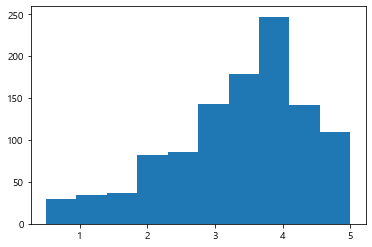

In [334]:
# 히스토그램
plt.hist(df_2)

<function matplotlib.pyplot.show(close=None, block=None)>

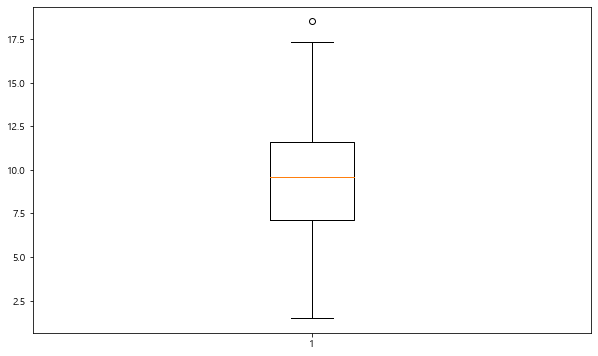

In [340]:
# 박스플롯

fig = plt.figure(figsize=(10, 6))
ax3 = fig.add_subplot(1, 1, 1)

ax3.boxplot(df_1)
plt.show

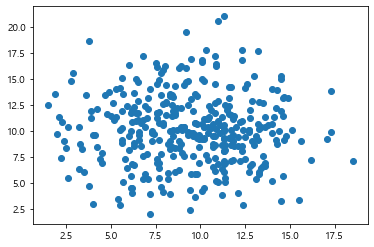

In [347]:
seoul_diff = weather_seoul_year.loc[(weather_seoul_year['year'] == 2015), 'diff_temp']
daegu_diff = weather_daegu_year.loc[(weather_daegu_year['year'] == 2015), 'diff_temp']
diff_df = pd.DataFrame({'seoul': seoul_diff.values,
                        'daegu': daegu_diff.values})
diff_df
plt.scatter(seoul_diff, daegu_diff)

In [355]:
# 공분산

diff_df['seoul_deviation'] = diff_df['seoul'] - diff_df['seoul'].mean()
diff_df['daegu_deviation'] = diff_df['daegu'] - diff_df['daegu'].mean()
diff_df['product_deviation'] = diff_df['seoul_deviation'] * diff_df['daegu_deviation']
print(diff_df['product_deviation'].mean())
cov_matrix = np.cov(seoul_diff[:10], daegu_diff[:10], ddof=1)
print(cov_matrix)
diff_df

-0.21896781789638997
[[4.19877778 2.925     ]
 [2.925      8.42055556]]


,seoul,daegu,seoul_deviation,daegu_deviation,product_deviation
0,5.5,10.1,-3.864384,-0.037088,0.143322
1,7.1,12.1,-2.264384,1.962912,-4.444786
2,12.3,17.8,2.935616,7.662912,22.495371
3,8.3,13.3,-1.064384,3.162912,-3.366552
4,9.0,10.1,-0.364384,-0.037088,0.013514
...,...,...,...,...,...
360,7.9,10.7,-1.464384,0.562912,-0.824319
361,8.5,13.2,-0.864384,3.062912,-2.647531
362,11.6,13.1,2.235616,2.962912,6.623935
363,7.8,13.4,-1.564384,3.262912,-5.104446


In [356]:
# 상관계수

corr_coef = np.corrcoef(seoul_diff[:10], daegu_diff[:10])
print(corr_coef)

[[1.         0.49191952]
 [0.49191952 1.        ]]
